# Predicting Heart Disease using Machine Learning

* Original Dataset obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* Version also available on [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score, f1_score, plot_roc_curve

In [2]:
warnings.filterwarnings("ignore")
# Looking quickly at data
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

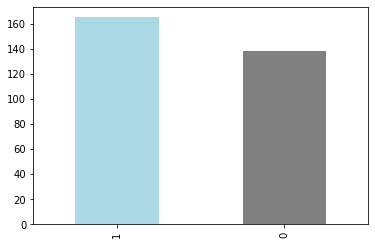

In [5]:
df["target"].value_counts().plot(kind='bar', color=["lightblue","grey"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


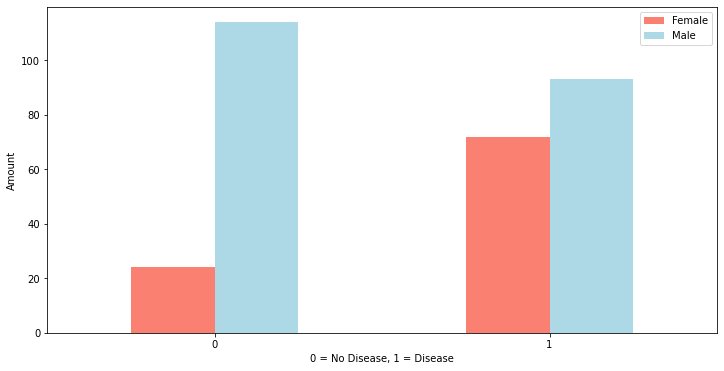

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(12,6),
                                  color=['salmon','lightblue']);

plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Heart Disease Frequency per Chest Pain Type

In [11]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


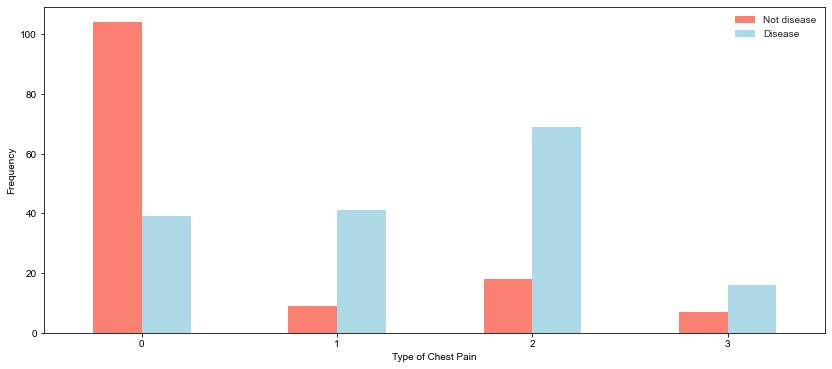

In [12]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(14,6),
                                  color=['salmon','lightblue']);
plt.style.use("seaborn")
plt.xlabel("Type of Chest Pain")
plt.ylabel('Frequency')
plt.legend(["Not disease","Disease"]);
plt.xticks(rotation=0);

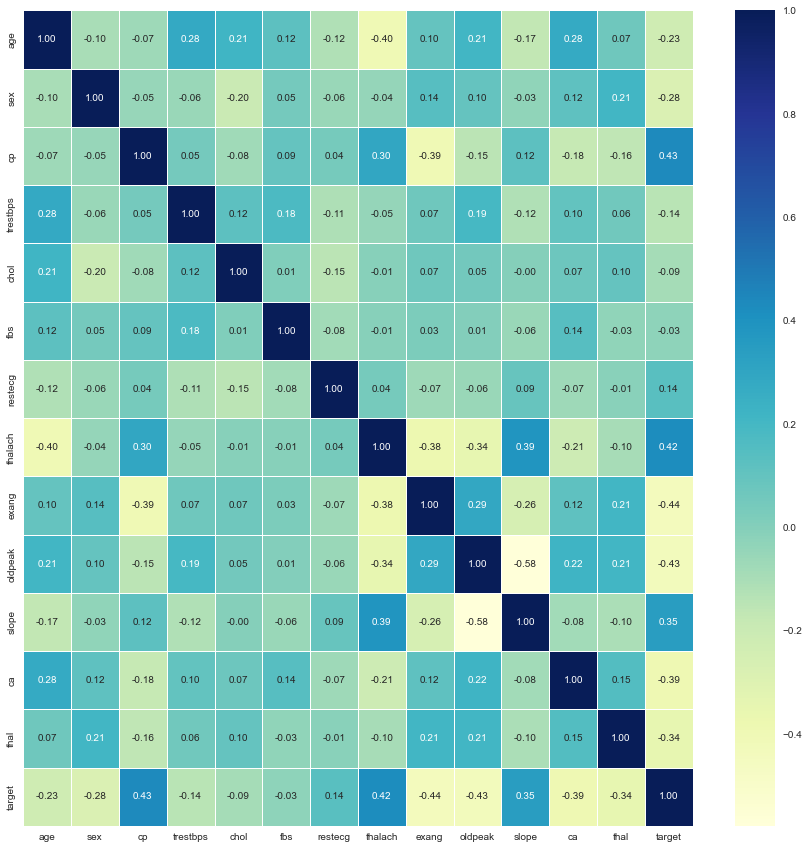

In [13]:
# Correational matrix
corr_matrx=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_matrx,
              annot=True,
              linewidths=1,
              fmt='.2f',
              cmap='YlGnBu')

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Modelling

In [15]:
X=df.drop('target',axis=1)
y=df['target']

In [16]:
np.random.seed(40)

# Splitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
models={"Logistic Regression": LogisticRegression(),
        "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(40)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

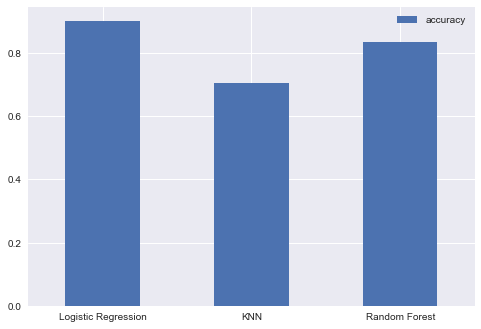

In [18]:
model_scores=fit_score(models,X_train,X_test,y_train,y_test);
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

## HyperParameter Tuning

In [19]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

In [20]:
# Tuning KNN
train_scores=[]
test_scores=[]

neighbours =range(1,31)
knn=KNeighborsClassifier();

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Max KNN score: 73.77%


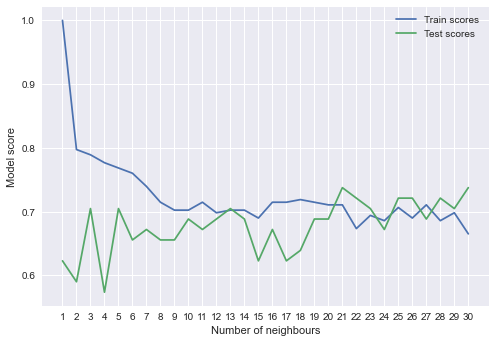

In [21]:
plt.plot(neighbours,train_scores,label='Train scores')
plt.plot(neighbours,test_scores,label='Test scores')
plt.xticks(np.arange(1,31,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()

print(f"Max KNN score: {max(test_scores)*100:.2f}%")

## HyperParameter tuning with RandomizedSearchCV

In [22]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}
rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [23]:
np.random.seed(24)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [25]:
rs_log_reg.score(X_test,y_test)

0.9016393442622951

In [26]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                     param_distributions=rf_grid,
                     cv=5,
                     n_iter=20,
                     verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.score(X_test,y_test)

0.8852459016393442

In [28]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [29]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

## HyperParameter tuning using GridSearchCV

In [30]:
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver": ["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [32]:
gs_log_reg.score(X_test,y_test)

0.9016393442622951

In [33]:
model_scores

{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8360655737704918}

## Evaluating the model

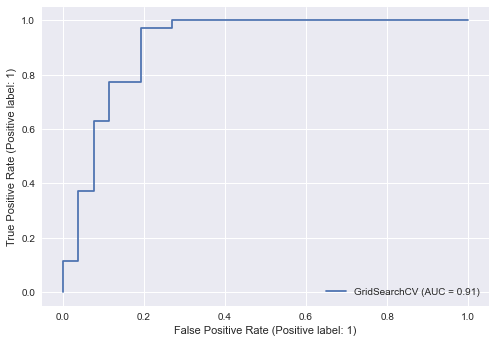

In [34]:
y_preds=gs_log_reg.predict(X_test)
plot_roc_curve(gs_log_reg,X_test,y_test)

In [35]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[21  5]
 [ 1 34]]


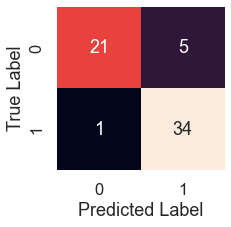

In [36]:
import seaborn as sns
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)

In [37]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.87      0.97      0.92        35

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [38]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [39]:
clf=LogisticRegression(C=0.1082636733874054,
                      solver='liblinear')

In [40]:
# Cross-validated evaluation
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')

In [43]:
cv_acc=np.mean(cv_acc)

In [45]:
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)

In [46]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)

In [47]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)

In [48]:
cv_acc,cv_recall,cv_precision,cv_f1

(0.8380874316939891,
 0.9090909090909092,
 0.8191596638655462,
 0.8607249810576448)

### Feature importance

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
clf=LogisticRegression(C=0.1082636733874054,
                      solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [51]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.005672937170116759,
 'sex': -0.600722071731392,
 'cp': 0.6698009067104619,
 'trestbps': -0.021267914766047034,
 'chol': -0.001609212331250128,
 'fbs': -0.06916533161946076,
 'restecg': 0.2720860343476741,
 'thalach': 0.028931992699730277,
 'exang': -0.33585020311603037,
 'oldpeak': -0.40005284024565063,
 'slope': 0.23081045393519706,
 'ca': -0.5481960806584047,
 'thal': -0.5052354362825722}

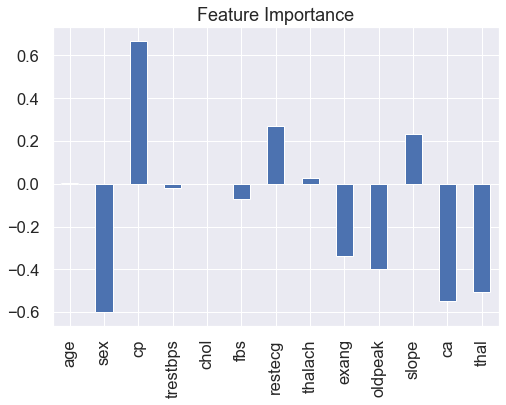

In [54]:
feature_df=pd.DataFrame(feature_dict,
                       index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);